In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import datetime

In [2]:
state_inflow = pd.read_csv("data/stateinflow.csv", sep = ",")
state_inflow.drop('y1_statefips.1', inplace=True, axis=1)
state_inflow = state_inflow.rename(columns={'y1_statefips': 'Inflow_State', 'y1_state':'Origin_State', 'y1_state_name': 'Origin_Extended_Name', 'n1': 'Num_Returns', 'n2': 'Num_Exemptions', 'AGI': 'Adj_Gross_Income'})
print(state_inflow.head())
print(state_inflow.info())

  Inflow_State Origin_State               Origin_Extended_Name  Num_Returns  \
0           AL           AL  AL Total Migration-US and Foreign        47578   
1           AL           AL              AL Total Migration-US        46908   
2           AL           AL         AL Total Migration-Foreign          670   
3           AL           AL      AL Total Migration-Same State        59337   
4           AL           AL                    AL Non-migrants      1582765   

   Num_Exemptions  Adj_Gross_Income  Year  
0           97703           2754842  2018  
1           96089           2714756  2018  
2            1614             40086  2018  
3          119622           2833824  2018  
4         3468405         104423723  2018  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28300 entries, 0 to 28299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Inflow_State          28300 non-null  object
 1 

Plot of Adjusted Gross Income from 2009 to 2018
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


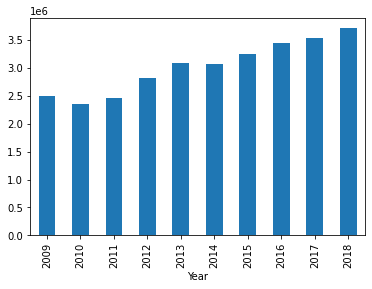

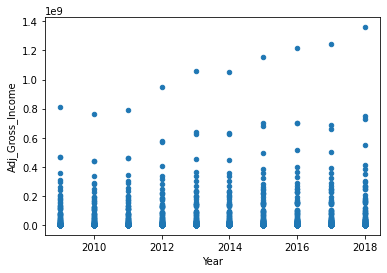

In [3]:
print('Plot of Adjusted Gross Income from 2009 to 2018')
print(state_inflow.groupby('Year')['Adj_Gross_Income'].mean().plot.bar())
print(state_inflow.plot(kind='scatter', x='Year', y='Adj_Gross_Income'))

Top Adjusted Gross Income for Incoming Migration from 2009-2018
Origin_State
CA    11079418512
TX     6561614992
NY     6460825169
FL     5042778331
IL     3804550761
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


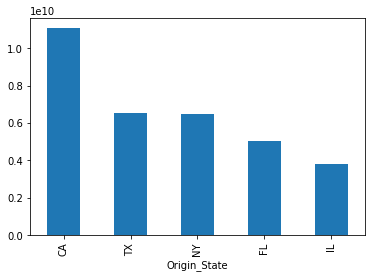

In [4]:
#Sum of adjusted gross income for Origin State
Sum_Origin_Adj_Income=state_inflow.groupby('Origin_State')['Adj_Gross_Income'].sum()
Sum_Origin_Adjincome=Sum_Origin_Adj_Income.sort_values(ascending=False).head()
print('2018 Top Adjusted Gross Income for Incoming Migration from 2009-2018')
print(Sum_Origin_Adjincome)
print(Sum_Origin_Adjincome.plot.bar())

California Top Inflow States
Origin_State
NY    2560286
TX    1613625
WA    1347022
FL    1227402
IL    1076092
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


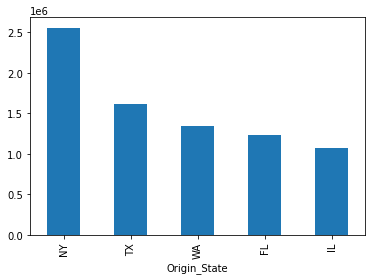

In [5]:
CA_2018= state_inflow.loc[229:279,'Inflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Origin State
CA_2018_AdjIncome=CA_2018.groupby('Origin_State')['Adj_Gross_Income'].sum()
CA2018=CA_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 California Top Inflow States')
print(CA2018.head())
print(CA2018.plot.bar())

Florida Top Inflow States
Origin_State
NY    4197788
NJ    2579442
IL    2024298
CA    1831536
PA    1672492
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


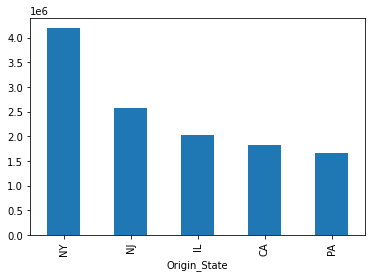

In [6]:
FL_2018= state_inflow.loc[508:558,'Inflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Origin State
FL_2018_AdjIncome=FL_2018.groupby('Origin_State')['Adj_Gross_Income'].sum()
FL2018=FL_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 Florida Top Inflow States')
print(FL2018.head())
print(FL2018.plot.bar())

New York Top Inflow States
Origin_State
NJ    2438314
CA    1767113
FL    1373798
CT     956496
PA     702402
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


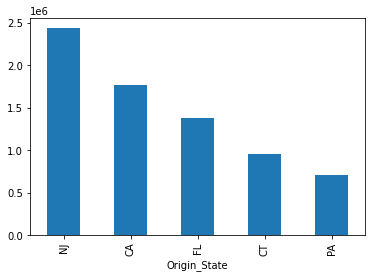

In [7]:
NY_2018= state_inflow.loc[1796:1846,'Inflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Origin State
NY_2018_AdjIncome=NY_2018.groupby('Origin_State')['Adj_Gross_Income'].sum()
NY2018=NY_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 New York Top Inflow States')
print(NY2018.head())
print(NY2018.plot.bar())

Texas Top Inflow States
Origin_State
CA    3143998
FL    1128062
NY     966095
IL     860834
CO     723680
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


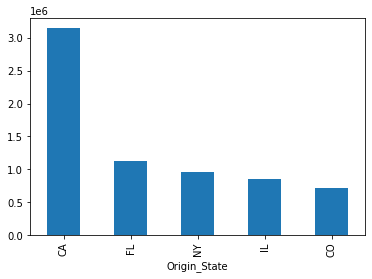

In [8]:
TX_2018= state_inflow.loc[2412:2462,'Inflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Origin State
TX_2018_AdjIncome=TX_2018.groupby('Origin_State')['Adj_Gross_Income'].sum()
TX2018=TX_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 Texas Top Inflow States')
print(TX2018.head())
print(TX2018.plot.bar())

In [9]:
state_outflow = pd.read_csv("data/stateoutflow.csv", sep = ",")
state_outflow.drop('y2_statefips', inplace=True, axis=1)
state_outflow = state_outflow.rename(columns={'y1_statefips': 'Origin_State', 'y2_state':'Outflow_State', 'y2_state_name': 'Origin_Extended_Name', 'n1': 'Num_Returns', 'n2': 'Num_Exemptions', 'AGI': 'Adj_Gross_Income'})
print(state_outflow.head())
print(state_outflow.info())

  Origin_State Outflow_State               Origin_Extended_Name  Num_Returns  \
0           AL            AL  AL Total Migration-US and Foreign        45226   
1           AL            AL              AL Total Migration-US        44600   
2           AL            AL         AL Total Migration-Foreign          626   
3           AL            AL      AL Total Migration-Same State        59337   
4           AL            AL                    AL Non-migrants      1582765   

   Num_Exemptions  Adj_Gross_Income  Year  
0           89318           2474087  2018  
1           87927           2439333  2018  
2            1391             34755  2018  
3          119622           2833824  2018  
4         3468405         104423723  2018  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28300 entries, 0 to 28299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Origin_State          28300 non-null  obje

Plot of Adjusted Gross Income from 2009 to 2018 for Outflow Migration
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


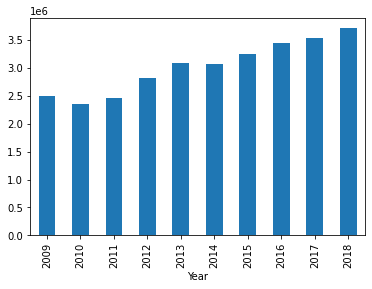

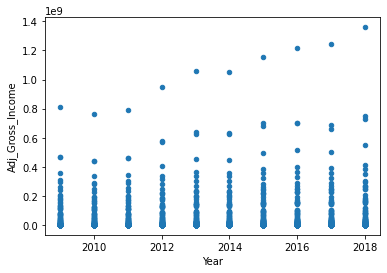

In [10]:
print('Plot of Adjusted Gross Income from 2009 to 2018 for Outflow Migration')
print(state_outflow.groupby('Year')['Adj_Gross_Income'].mean().plot.bar())
print(state_outflow.plot(kind='scatter', x='Year', y='Adj_Gross_Income'))

Top Adjusted Gross Income for Outflow Migration from 2009-2018
Outflow_State
CA    11115390326
TX     6527753000
NY     6521611474
FL     4943288726
IL     3841186482
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


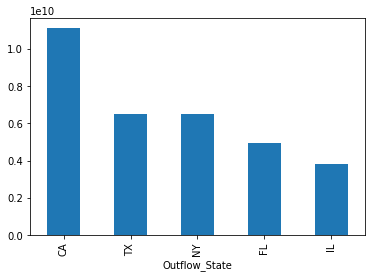

In [14]:
#Sum of adjusted gross income for Origin State for Outflow Migration
Sum_Origin_Adj_Income=state_outflow.groupby('Outflow_State')['Adj_Gross_Income'].sum()
Sum_Origin_Adjincome=Sum_Origin_Adj_Income.sort_values(ascending=False).head()
print('Top Adjusted Gross Income for Outflow Migration from 2009-2018')
print(Sum_Origin_Adjincome)
print(Sum_Origin_Adjincome.plot.bar())

California Top Ouflow States
Outflow_State
TX    3143998
WA    2466521
NV    2379177
AZ    2078363
FL    1831536
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


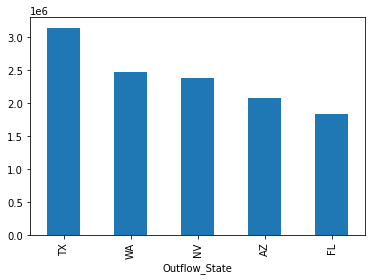

In [15]:
CA_2018= state_outflow.loc[229:279,'Outflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Origin State
CA_2018_AdjIncome=CA_2018.groupby('Outflow_State')['Adj_Gross_Income'].sum()
CA2018=CA_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 California Top Ouflow States')
print(CA2018.head())
print(CA2018.plot.bar())

2018 Florida Top Outflow States
Outflow_State
NY    1373798
GA    1351304
CA    1227402
TX    1128062
NC    1062245
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


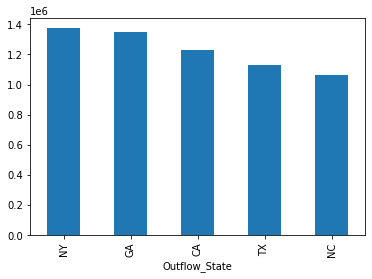

In [17]:
FL_2018= state_outflow.loc[508:558,'Outflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Origin State
FL_2018_AdjIncome=FL_2018.groupby('Outflow_State')['Adj_Gross_Income'].sum()
FL2018=FL_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 Florida Top Outflow States')
print(FL2018.head())
print(FL2018.plot.bar())

2018 New York Top Outflow States
Outflow_State
FL    4197788
NJ    3886637
CA    2560286
CT    2000952
PA    1046406
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


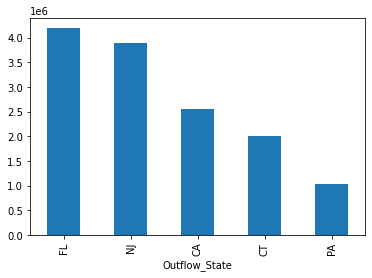

In [18]:
NY_2018= state_outflow.loc[1796:1846,'Outflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Outflow State
NY_2018_AdjIncome=NY_2018.groupby('Outflow_State')['Adj_Gross_Income'].sum()
NY2018=NY_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 New York Top Outflow States')
print(NY2018.head())
print(NY2018.plot.bar())

2018 Texas Top Outflow States
Outflow_State
CA    1613625
FL    1270705
CO    1020972
NY     585295
WA     572721
Name: Adj_Gross_Income, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


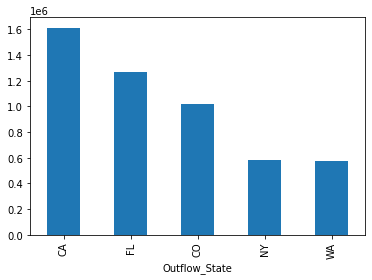

In [19]:
TX_2018= state_outflow.loc[2412:2462,'Outflow_State':'Adj_Gross_Income']
#Sum of adjusted gross income for Origin State
TX_2018_AdjIncome=TX_2018.groupby('Outflow_State')['Adj_Gross_Income'].sum()
TX2018=TX_2018_AdjIncome.sort_values(ascending=False).head()
print('2018 Texas Top Outflow States')
print(TX2018.head())
print(TX2018.plot.bar())